In [10]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [4]:
# Define call and put functions predicated on Black-Scholes assumptions
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

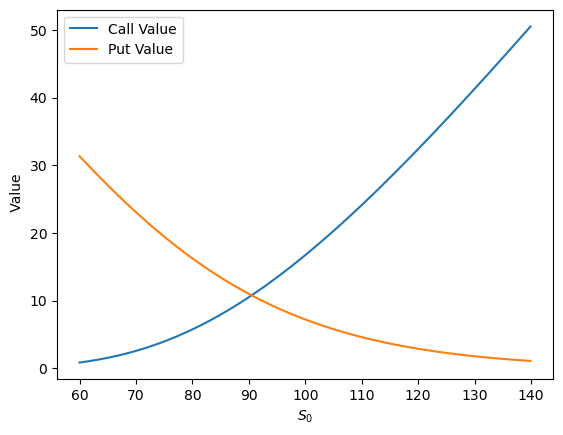

In [6]:
# Every factor constant except stock price S

K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

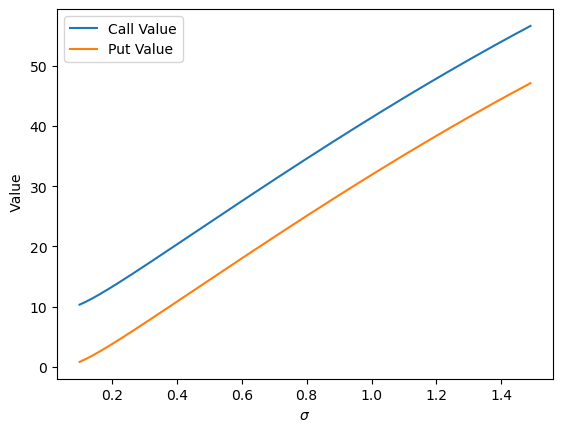

In [7]:
# This time, graph shows change in volatility

K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

C:\Users\cpsw1\AppData\Local\Temp\ipykernel_36248\2751703682.py:4: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
C:\Users\cpsw1\AppData\Local\Temp\ipykernel_36248\2751703682.py:9: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


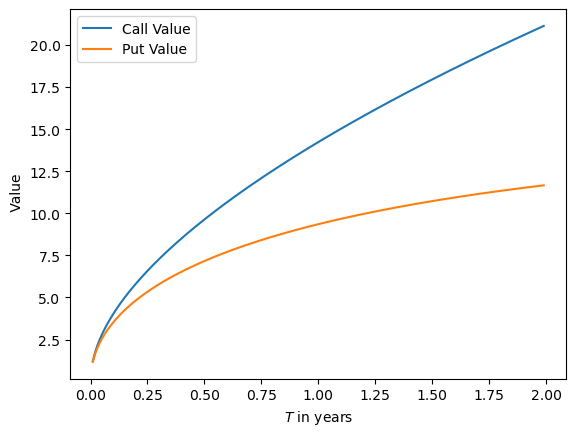

In [8]:
# Time to experation displayed here - as time increases, so does uncertainty

K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'DIS Rolling Volatility')

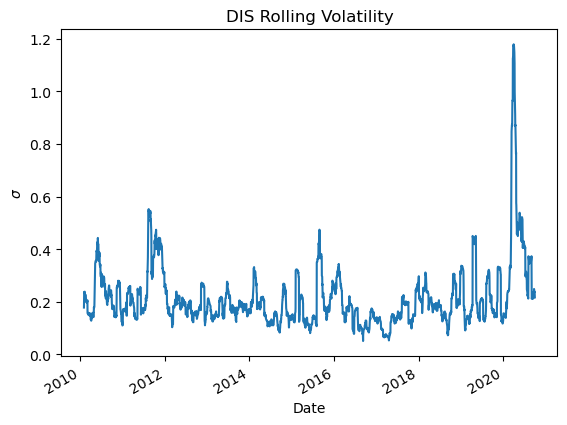

In [13]:
# Real example with Disney ($DIS)

start = dt.datetime(2010,1,1)    
end =dt.datetime(2020,10,1) 
symbol = 'DIS' ###using Apple as an example
source = 'yahoo'
data = yf.download(symbol, start, end)
data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)


data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('DIS Rolling Volatility')

C:\Users\cpsw1\AppData\Local\Temp\ipykernel_36248\1166305858.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=data['change'].dropna(), label='Empirical', ax=ax,shade=True)
C:\Users\cpsw1\AppData\Local\Temp\ipykernel_36248\1166305858.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)


Text(0, 0.5, 'Density')

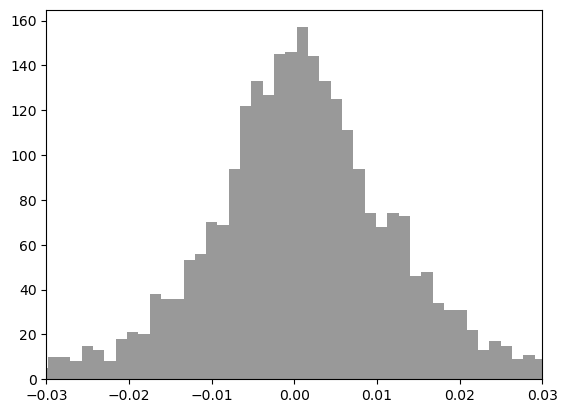

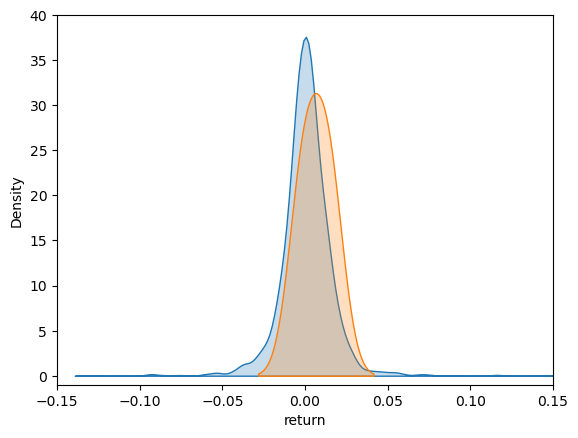

In [20]:
# Plot empirical vs. Log-Normal distribution for Apple

std = data.change.std()
WT = np.random.normal(data.change.mean() ,std, size=2)
plt.hist(np.exp(WT)-1,bins=300,color='red',alpha=0.4);
plt.hist(data.change,bins=200,color='black', alpha=0.4);
plt.xlim([-0.03,0.03])

import seaborn as sns

fig, ax = plt.subplots()
ax = sns.kdeplot(data=data['change'].dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.xlabel('Return')
plt.ylabel('Density')